# Алёшин А.Д.
# ИУ5-83Б

# Лабораторная работа 5. Рекомендации по формализации и расчетам характеристик подсистем КИС в виде разомкнутых или замкнутых стохастических моделей

## Задание 1.

Для  одноканальной системы массового обслуживания с ограничением на длину очереди $m$ составьте дифференциальные уравнения для вероятностей нахождения в заданных состояниях в зависимости от времени. Найдите эти вероятности при определенном в соответствии с вариантом значении $t$, а также при $t\rightarrow \infty$. Канал иногда может выходить из строя. Заявка, которая обслуживается в момент отказа канала ставится в очередь, если там есть места, в противном случае она покидает систему необслуженной. Входящий поток, поток обслуживания, поток отказов и поток восстановления простейшие с соответствующими интенсивностями $\lambda, \mu, \nu, \gamma$. Количество клиентов, от которых могут поступать заявки на обслуживание $k$. Начальные условия $P_0(0)=1$. 
    
    Найти (теоретически и экспериментально):
    
     - вероятность простоя;
     - вероятность образования очереди;     
     - абсолютную пропускную способность;     
     - среднюю длину очереди;     
     - среднее время нахождения заявок в системе;     
     - среднее число заявок в системе.     
     - среднее время нахождения в очереди.

In [2]:
Variant<-14
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda; 
   lambda<-mu; 
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu; 
   nu<-gamma; 
   gamma<-current}
if (sample(c(0:1),1)) 
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
data.frame(lambda, mu, nu, gamma, k, m, t)

[1] "--------------"


lambda,mu,nu,gamma,k,m,t
0.6378273,0.9571886,0.5525467,0.9830671,5,12,0.4284277


In [3]:
Variant<-1
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda; 
   lambda<-mu; 
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu; 
   nu<-gamma; 
   gamma<-current}
if (sample(c(0:1),1)) 
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
data.frame(lambda, mu, nu, gamma, k, m, t)

[1] "--------------"


lambda,mu,nu,gamma,k,m,t
0.3721239,0.5728534,0.2016819,0.9082078,inf,12,0.9446753


# Теоретическое решение

Граф состояний системы:
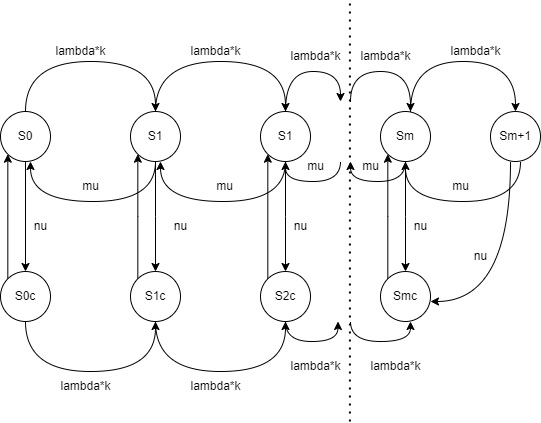
Зададим состостояния:

-   $S_0$ - канал свободен, очередь пуста, канал без отказов;
-   $S_1$ - канал занят, очередь пуста, канал без отказов;
-   $S_i, \; i \le m+1$ - канал занят, очередь состоит из $i-1$ заявки,
    канал без отказов;
-   $S_0с$ - очередь пуста, канал не работает;
-   $Sс_1$ - очередь состоит из 1 заявки, канал не работает;
-   $S_iс, \; i \le m$ - очередь состоит из $i$ заявок, канал не
    работает.

Составим уравнения Колмогорова:
\begin{cases}
\frac{dP_0(t)}{dt} = - (\lambda + \nu) \cdot P_0(t) + \mu \cdot P_1(t) + \gamma \cdot P_{0c}(t) \\ 
\frac{dP_1(t)}{dt} = - (\lambda + \nu + \mu) \cdot P_1(t) + \mu \cdot P_2(t) + \gamma \cdot P_{1c}(t) + \lambda \cdot P_0(t) \\ 
... \\
\frac{dP_m(t)}{dt} = - (\lambda + \nu + \mu) \cdot P_m(t) +
\mu \cdot P_{m+1}(t) + \gamma \cdot P_{mc}(t) + \lambda \cdot P_{m-1}(t) \\ \frac{dP_{m+1}(t)}{dt} = - (\nu + \mu) \cdot P_{m+1}(t) + \lambda \cdot P_{m}(t) \\
\frac{dP_{0c}(t)}{dt} = - (\lambda + \gamma) \cdot P_{0c}(t) + \nu \cdot P\_{0}(t) \\
\frac{dP_{1c}(t)}{dt} = - (\lambda + \gamma) \cdot P_{1c}(t) + \nu \cdot P_{1}(t) + \lambda \cdot P_{0c}(t) \\ 
... \\
\frac{dP_{(m-1)c}(t)}{dt} = - (\lambda + \gamma) \cdot P\_{(m-1)c}(t) + \nu \cdot P\_{m-1}(t) + \lambda \cdot P_{(m-2)c}(t) \\ 
\frac{dP_{mc}(t)}{dt} = - \gamma \cdot P_{mc}(t) + \nu \cdot P\_{m}(t) + \nu \cdot P_{m+1}(t) + \lambda \cdot P_{(m-1)c}\\
\end{cases}

Составим СДУ для заданного $m=12$:
\begin{cases}
\frac{dP_0(t)}{dt} = - (k \cdot \lambda + \nu) \cdot P_0(t) + \mu \cdot P_1(t) + \gamma \cdot P_{0c}(t) \\
\frac{dP_1(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_1(t) + \mu \cdot P_2(t) + \gamma \cdot P_{1c}(t) + k \cdot \lambda \cdot P_0(t) \\
\frac{dP_2(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_2(t) + \mu \cdot P_3(t) + \gamma \cdot P_{2c}(t) + k \cdot \lambda \cdot P_1(t) \\
\frac{dP_3(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_3(t) + \mu \cdot P_4(t) + \gamma \cdot P_{3c}(t) + k \cdot \lambda \cdot P_2(t) \\
\frac{dP_4(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_4(t) + \mu \cdot P_5(t) + \gamma \cdot P_{4c}(t) + k \cdot \lambda \cdot P_3(t) \\
\frac{dP_5(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_5(t) + \mu \cdot P_6(t) + \gamma \cdot P_{5c}(t) + k \cdot \lambda \cdot P_4(t) \\
\frac{dP_6(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_6(t) + \mu \cdot P_7(t) + \gamma \cdot P_{6c}(t) + k \cdot \lambda \cdot P_5(t) \\
\frac{dP_7(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_7(t) + \mu \cdot P_8(t) + \gamma \cdot P_{7c}(t) + k \cdot \lambda \cdot P_6(t) \\
\frac{dP_8(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_8(t) + \mu \cdot P_{9}(t) + \gamma \cdot P_{8c}(t) + k \cdot \lambda \cdot P_{7}(t) \\
\frac{dP_9(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_9(t) + \mu \cdot P_{10}(t) + \gamma \cdot P_{9c}(t) + k \cdot \lambda \cdot P_{8}(t) \\
\frac{dP_{10}(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_{10}(t) + \mu \cdot P_{11}(t) + \gamma \cdot P_{10c}(t) + k \cdot \lambda \cdot P_{9}(t) \\
\frac{dP_{11}(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_{11}(t) + \mu \cdot P_{12}(t) + \gamma \cdot P_{11c}(t) + k \cdot \lambda \cdot P_{10}(t) \\
\frac{dP_{12}(t)}{dt} = - (k \cdot \lambda + \nu + \mu) \cdot P_{12}(t) + \mu \cdot P_{13}(t) + \gamma \cdot P_{12c}(t) + k \cdot \lambda \cdot P_{11}(t) \\
\frac{dP_{13}(t)}{dt} = - (\nu + \mu) \cdot P_{13}(t) + k \cdot \lambda \cdot P_{12}(t) \\
\frac{dP_{0c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{0c}(t) + \nu \cdot P_{0}(t) \\
\frac{dP_{1c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{1c}(t) + \nu \cdot P_{1}(t) + k \cdot \lambda \cdot P_{0c}(t) \\
\frac{dP_{2c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{2c}(t) + \nu \cdot P_{2}(t) + k \cdot \lambda \cdot P_{1c}(t) \\
\frac{dP_{3c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{3c}(t) + \nu \cdot P_{3}(t) + k \cdot \lambda \cdot P_{2c}(t) \\
\frac{dP_{4c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{4c}(t) + \nu \cdot P_{4}(t) + k \cdot \lambda \cdot P_{3c}(t) \\
\frac{dP_{5c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{5c}(t) + \nu \cdot P_{5}(t) + k \cdot \lambda \cdot P_{4c}(t) \\
\frac{dP_{6c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{6c}(t) + \nu \cdot P_{6}(t) + k \cdot \lambda \cdot P_{5c}(t) \\
\frac{dP_{7c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{7c}(t) + \nu \cdot P_{7}(t) + k \cdot \lambda \cdot P_{6c}(t) \\
\frac{dP_{8c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{8c}(t) + \nu \cdot P_{8}(t) + k \cdot \lambda \cdot P_{7c}(t) \\
\frac{dP_{9c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{9c}(t) + \nu \cdot P_{9}(t) + k \cdot \lambda \cdot P_{8c}(t) \\
\frac{dP_{10c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{10c}(t) + \nu \cdot P_{10}(t) + k \cdot \lambda \cdot P_{9c}(t) \\
\frac{dP_{11c}(t)}{dt} = - (k \cdot \lambda + \gamma) \cdot P_{11c}(t) + \nu \cdot P_{11}(t) + k \cdot \lambda \cdot P_{10c}(t) \\
\frac{dP_{12c}(t)}{dt} = - \gamma \cdot P_{12c}(t) + \nu \cdot P_{12}(t) + \nu \cdot P_{13}(t) + k \cdot \lambda \cdot P_{11c}(t)\\
\end{cases}